In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('winequality-red.csv')

In [32]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


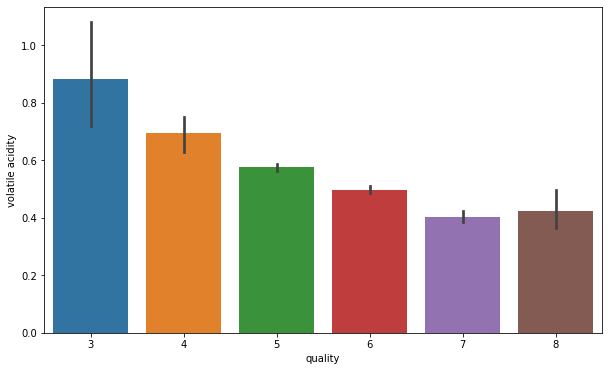

In [35]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

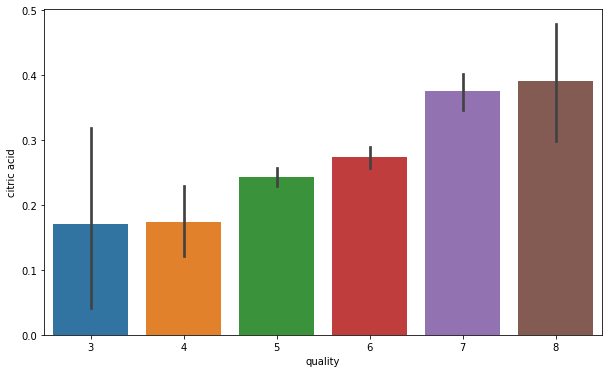

In [36]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

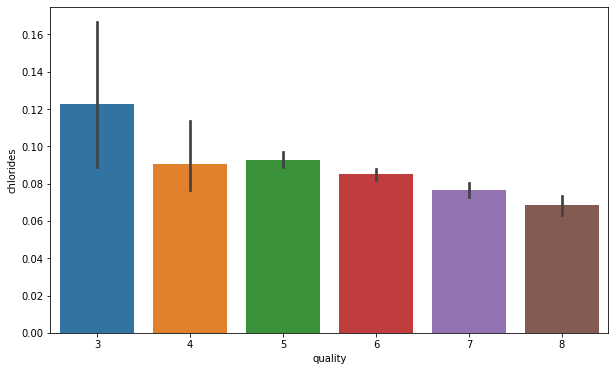

In [37]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

In [38]:
correl = data.corr(method = 'pearson')
correl

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [39]:
correl_copy = correl.copy()
for row in correl_copy.index:
    for column in correl_copy[row].index: 
        if abs(correl_copy[row][column]) < 0.6 or abs(correl_copy[row][column]) == 1.0: 
            correl_copy[row][column] = '-'
        else:
            correl_copy[row][column] = round(correl_copy[row][column], 2)

correl_copy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,-,-,0.67,-,-,-,-,0.67,-0.68,-,-,-
volatile acidity,-,-,-,-,-,-,-,-,-,-,-,-
citric acid,0.67,-,-,-,-,-,-,-,-,-,-,-
residual sugar,-,-,-,-,-,-,-,-,-,-,-,-
chlorides,-,-,-,-,-,-,-,-,-,-,-,-
free sulfur dioxide,-,-,-,-,-,-,0.67,-,-,-,-,-
total sulfur dioxide,-,-,-,-,-,0.67,-,-,-,-,-,-
density,0.67,-,-,-,-,-,-,-,-,-,-,-
pH,-0.68,-,-,-,-,-,-,-,-,-,-,-
sulphates,-,-,-,-,-,-,-,-,-,-,-,-


In [40]:
y = np.array(data.pop('quality'))
X = data.drop(['citric acid', 'density', 'pH', 'total sulfur dioxide'], axis = 1)

In [41]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify = y,
                                                    test_size=0.2, shuffle = True, random_state=1)

In [42]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [43]:
pca = PCA(n_components = 5)
pca.fit(train_X_scaled)
train_X_scaled_pca = pca.transform(train_X_scaled)
test_X_scaled_pca = pca.transform(test_X_scaled)

KNN

In [45]:
metric_values = []
for n_neighbors in range(1, 200):
    knc = KNeighborsClassifier(n_neighbors = n_neighbors, weights = 'distance', p = 1)
    knc.fit(train_X_scaled_pca, train_y)
    rf_predictions = knc.predict(test_X_scaled_pca)
    rf_probs = knc.predict_proba(test_X_scaled_pca)
    metric_values.append(roc_auc_score(test_y, rf_probs, multi_class = 'ovr'))

roc_auc_score_max = max(list(enumerate(metric_values, 1)), key=lambda i : i[1])
print(f'The value of the parameter "n_neighbors" in the KNN Classifier: {roc_auc_score_max[0]}')
print(f'The max value of the metric "roc_auc_score" in the test sample: {round(roc_auc_score_max[1], 4)}')

The value of the parameter "n_neighbors" in the KNN Classifier: 131
The max value of the metric "roc_auc_score" in the test sample: 0.9026


SVC

In [52]:
svc = SVC()
svc.fit(train_X_scaled_pca, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
Y_pred = knc.predict_proba(test_X_scaled_pca)

In [54]:
roc_auc_score(test_y, Y_pred, multi_class = 'ovr')

0.8969082664948272

Проверяли мы качество модели на метрике ROC AUC score
Эта метрика вычисляет площадь под кривой рабочих характеристик приемника (ROC AUC) по прогнозфм модели.